DIRECTIONS: In addition, you need to develop an application in a high-level programming language that demonstrates the interaction with the database. The application should allow the user to run queries on the tables, and insert/update/delete data into the tables. One of the queries should include a join of at least 3 tables. The application can work from the command line (i.e., it does not have to include a graphical user interface).

In [1]:
# Loading Packages and Imports
from mysql.connector import connect, Error
from getpass import getpass
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Run Function to Connect MySQL Server
# Username = root
# Password = Password for MySQL

try:
    conn = connect(
        host = "localhost",
        user = input("Enter Username: "),
        password = getpass("Enter Password: "),
        database = "library"
    )

except Error as e:
    print(e)

Enter Username: root
Enter Password: ········


Simple Test Query

In [3]:
# Can Include Any Query in inst_query Statement

inst_query = "SELECT * FROM authors"
with conn.cursor() as cursor:
    cursor.execute(inst_query)
    result = cursor.fetchall()
    for row in result:
        # can also write print(row[2]) to just get the last names
        print(row) 

(4073, 'Dan', 'Brown')
(4795, 'Herman', 'Melville')
(5868, 'Emily', 'Bronte')
(14908, 'Jane', 'Austen')
(16623, 'Leo', 'Tolstoy')
(19085, 'John', 'Steinbeck')
(20491, 'Chinua', 'Achebe')
(30262, 'Jerome', 'Salinger')
(33849, 'George', 'Orwell')
(44896, 'Ray', 'Bradbury')
(45021, 'Yann', 'Martel')
(54878, 'Margaret', 'Atwood')
(59769, 'William', 'Shakespeare')
(70952, 'Francis', 'Fitzgerald')
(89972, 'Jonathan', 'Swift')
(91913, 'Mary', 'Shelly')
(94578, 'Charlotte', 'Bronte')
(95962, 'Harper', 'Lee')
(98514, 'Anthony', 'Burgess')


Inserting New Records from Owner of DB

In [36]:
# Example: Adds Colleen Hoover to Authors

add_inst_query = """
    INSERT INTO authors
    VALUES("55555", "Colleen", "Hoover")
"""

# Call Query
with conn.cursor() as cursor:
    cursor.execute(add_inst_query)
    conn.commit()

Inserting Records from User (Parameterized Query)

In [34]:
# Example: Adding a Borrower

# Increase Database Parameter Value
innodb_lock_wait_timeout = 100

inst_id = input("Enter Borrower ID (5 Digits): ")
inst_first = input("Enter Borrower First Name: ")
inst_last = input("Enter Borrower Last Name: ")
inst_card = input("Enter Borrower Library Card ID (10000_ _): ")
inst_phone = input("Enter Borrower Phone Number: ")
inst_email = input("Enter Borrower Email: ")
inst_branch = input("Enter the Borrower Home Branch (1-10): ")

add_borrower_query = """
    INSERT INTO borrower
    VALUES (%s, %s, %s, %s, %s, %s, %s)
"""

val_tuple = (inst_id, inst_first, inst_last, inst_card, inst_phone,
             inst_email, inst_branch)

# Call Query
with conn.cursor() as cursor:
    cursor.execute(add_borrower_query, val_tuple)
    conn.commit()

Enter Borrower ID (5 Digits): 44444
Enter Borrower First Name: Jesse
Enter Borrower Last Name: Whiteford
Enter Borrower Library Card ID (10000_ _): 1000021
Enter Borrower Phone Number: 5678768900
Enter Borrower Email: whiteford.j@northeastern.edu
Enter the Borrower Home Branch (1-10): 5


Inserting Bulk of Records from Owner of DB

In [38]:
# Example: Adding These New Author IDs and Names into Authors

add_authors_query = """
    INSERT INTO authors
    (author_id, author_first, author_last)
    VALUES (%s, %s, %s)
"""

authors = [
    ("40022", "Mark", "Twain"),
    ("06961", "James", "Patterson"),
    ("35591", "Ernest", "Hemingway"),
    ("83781", "Stan", "Lee")
]

# Call Query
with conn.cursor() as cursor:
    cursor.executemany(add_authors_query, authors)
    conn.commit()

Updating and Deleting Records from Owner of DB

In [37]:
# Example:  Deletes the Previously Added Colleen Hoover

delete_inst_query = """
    DELETE FROM authors
    WHERE author_id = "55555"
"""

# Call Query
with conn.cursor() as cursor:
    cursor.execute(delete_inst_query)
    conn.commit()
    print("Number of Rows Deleted:", cursor.rowcount)

Number of Rows Deleted: 1


In [41]:
# Example: Deleting the Previously Added User Borrower

delete_user_borrower = """
    DELETE FROM borrower
    WHERE borrower_id = "44444"
"""

# Call Query
with conn.cursor() as cursor:
    cursor.execute(delete_user_borrower)
    conn.commit()
    print("Number of Rows Deleted:", cursor.rowcount)

Number of Rows Deleted: 1


In [39]:
# Example: Deletes the Previously Added Bulk of Authors

delete_bulk_authors = """
    DELETE FROM authors
    WHERE author_id = "40022"
        OR author_id = "06961"
        OR author_id = "35591"
        OR author_id = "83781"
"""

# Call Query
with conn.cursor() as cursor:
    cursor.execute(delete_bulk_authors)
    conn.commit()
    print("Number of Rows Deleted:", cursor.rowcount)

Number of Rows Deleted: 4


Complex Queries

In [20]:
# Example: Find the borrower that has the highest number of loans.

highest_fines = """
    SELECT b.borrower_id, b.borrower_first, b.borrower_last
    FROM borrower b, loans l
    WHERE b.borrower_id = l.borrower_id
    GROUP BY l.borrower_id
    HAVING count(*) >= ALL (
        SELECT count(*)
        FROM loans
        GROUP BY borrower_id
    )
"""

# Call Query
with conn.cursor() as cursor:
    cursor.execute(highest_fines)
    result = cursor.fetchall()
    print(result)

[(32176, 'Kartik', 'Tickoo')]


In [8]:
# Example: Find the title of each "Science Fiction" book that is NOT in Branch 5.

sci_fi = """
    SELECT books.title
    FROM books
    WHERE books.genre = "Science Fiction"
    AND books.title NOT IN(
        SELECT ISBN
        FROM branches, book_copies
        WHERE branches.branch_num = book_copies.branch_num
            AND branches.branch_num = "5"
    )
"""

# Call Query
with conn.cursor() as cursor:
    cursor.execute(sci_fi)
    result = cursor.fetchall()
    print(result)

[('Clockwork Orange',), ('1984',), ('Fahrenheit 451',), ('Frankenstein',)]


In [9]:
# Example: Find the IDs and names of the authors who have written at least 2 different books.

repeat_authors = """
    SELECT authors.author_id, authors.author_first, authors.author_last
    FROM authors, written_by
    WHERE authors.author_id = written_by.author_id
    GROUP BY written_by.author_id
    HAVING count(written_by.author_id) >= 2
"""

# Call Query
with conn.cursor() as cursor:
    cursor.execute(repeat_authors)
    result = cursor.fetchall()
    print(result)

[(33849, 'George', 'Orwell')]


In [29]:
# Example: Show the borrow date, due date, copy availability, borrower_id, and book title for every loan.
# Has Three Joins

loan_info = """
    SELECT l.loan_id, b.title, bc.availability, l.borrow_date, l.due_date, bor.borrower_id from loans l
    JOIN borrower bor ON l.borrower_id = bor.borrower_id
    JOIN book_copies bc ON bc.copy_num = l.copy_num
    JOIN books b ON bc.isbn = b.isbn
    ORDER BY borrow_date DESC;
"""

# Convert Query Results to Pandas DF
df1 = pd.read_sql(loan_info, conn)
df1

,loan_id,title,availability,borrow_date,due_date,borrower_id
0,42,War and Peace,Available,2022-11-20,2022-12-04,35279
1,41,Life of Pi,Available,2022-11-13,2022-11-27,68270
2,40,Animal Farm,Available,2022-11-13,2022-11-27,10085
3,39,To Kill a Mockingbird,Available,2022-11-13,2022-11-27,87483
4,38,Wuthering Heights,Available,2022-11-12,2022-11-26,32176
5,36,To Kill a Mockingbird,Available,2022-11-11,2022-11-25,21272
6,37,War and Peace,Available,2022-11-11,2022-11-25,68270
7,35,The Catcher in the Rye,Available,2022-11-10,2022-11-24,73335
8,34,To Kill a Mockingbird,Available,2022-11-10,2022-11-24,78170
9,33,Jane Eyre,Available,2022-11-10,2022-11-24,68270


At least two reports or graphs that show relevant information from the database.

In [30]:
# Example: Find how many borrowers belong to each branch.

branch_borrowers = """
    SELECT ALL branches.branch_name, count(distinct borrower.borrower_id) as count_borrower
    FROM borrower, branches
    WHERE borrower.home_branch_num = branches.branch_num
    GROUP BY branches.branch_name
"""

# Creating a DataFrame with SQL Query
df2 = pd.read_sql_query(branch_borrowers, con=conn)
df2

,branch_name,count_borrower
0,Allston,1
1,Back Bay,2
2,Beacon Hill,3
3,Cambridge,2
4,Dorchester,2
5,Downtown Boston,2
6,Fenway,3
7,Somerville,3
8,South End,1
9,West Roxbury,1


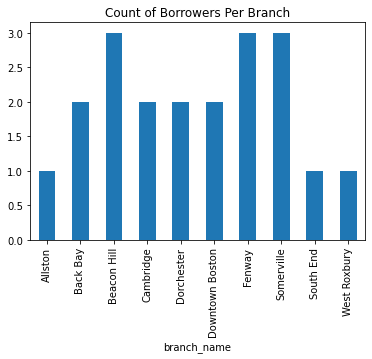

In [31]:
# Continued Example: Plotting the number of borrowers in each branch.
plot1 = df2.plot.bar(title = "Count of Borrowers Per Branch", x = "branch_name", y = "count_borrower", legend = False)

In [32]:
# Example: Find how many books belong to each genre.

book_genre = """
    SELECT ALL books.genre, count(books.title) as count_genre
    FROM books
    GROUP BY books.genre
"""

# Creating a DataFrame with SQL Query
df3 = pd.read_sql_query(book_genre, con=conn)
df3

,genre,count_genre
0,Fiction,8
1,Historical Fiction,2
2,Mystery,1
3,Science Fiction,4
4,Satire,1
5,Tragedy,2
6,Fantasy,1
7,Romance,1


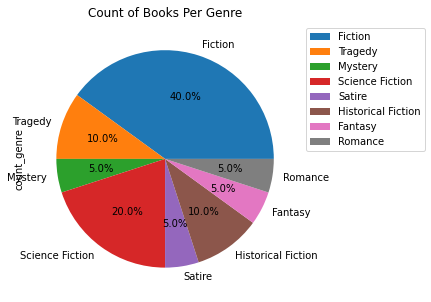

In [33]:
# Continued Example: Plotting the number of books per genre.

# Creating a Pie Chart
labels = ["Fiction", "Tragedy", "Mystery", "Science Fiction", "Satire", "Historical Fiction", "Fantasy", "Romance"]
plot2 = df3.plot.pie(title = "Count of Books Per Genre", y = "count_genre", figsize=(5,5), labels = labels, autopct = "%.1f%%").legend(bbox_to_anchor = (1,1))